<a href="https://colab.research.google.com/github/rakenputra/machine-learning/blob/main/Week%206/Clustering_Air_Water_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd

# Gantilah 'nama_file.csv' dengan nama file dataset yang Anda inginkan
file_path ='/content/drive/My Drive/Dataset/Air_water_quality.csv'

# Membaca dataset dari file CSV
dataset = pd.read_csv(file_path)

# Mengubah dataset menjadi dataframe
df = pd.DataFrame(dataset)
df.head()


,City,"""Region""","""Country""","""AirQuality""","""WaterPollution"""
0,New York City,"""New York""","""United States of America""",46.816038,49.504950
1,"Washington, D.C.","""District of Columbia""","""United States of America""",66.129032,49.107143
2,San Francisco,"""California""","""United States of America""",60.514019,43.000000
3,Berlin,"""""","""Germany""",62.364130,28.612717
4,Los Angeles,"""California""","""United States of America""",36.621622,61.299435


In [34]:
# Menampilkan seluruh nama kolom
print(df.columns)

Index(['City', 'Country', 'AirQuality', 'WaterPollution'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

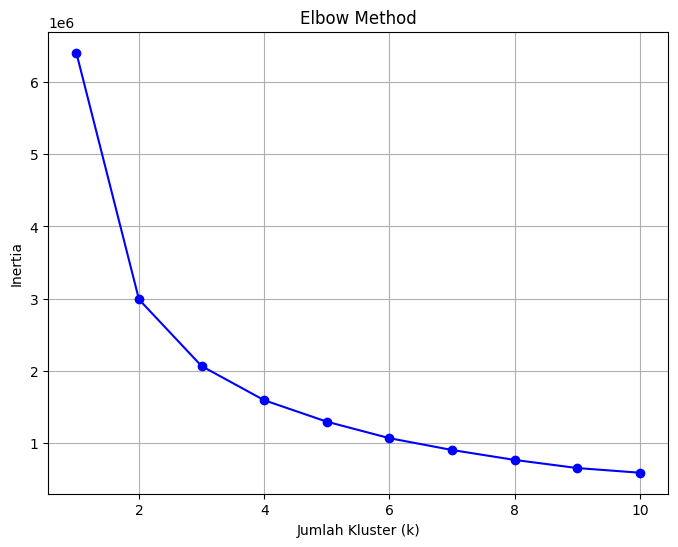

In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Memilih atribut yang akan digunakan untuk analisis klastering
attributes = df[['AirQuality', 'WaterPollution']]

# Inisialisasi list untuk menyimpan nilai inertia (inertia adalah ukuran seberapa jauh titik data dari pusat kluster)
inertia = []

# Menjalankan K-Means dengan jumlah kluster dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(attributes)
    inertia.append(kmeans.inertia_)

# Membuat plot elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Jumlah Kluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


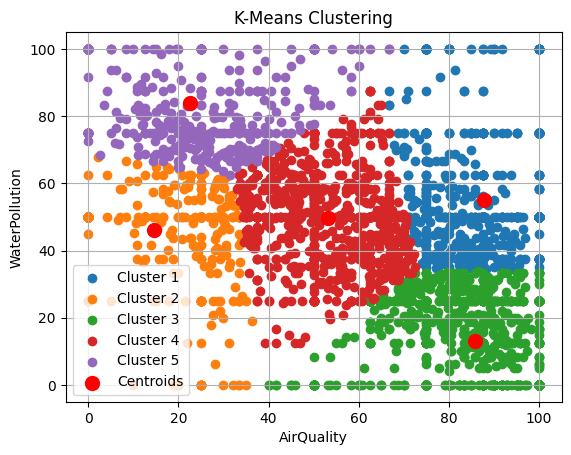

In [37]:
#Memilih atribut yang akan digunakan untuk analisis klastering
attributes = df[['AirQuality', 'WaterPollution']]

# Inisialisasi model K-Means dengan jumlah kluster=5
kmeans = KMeans(n_clusters=5, random_state=0)

# Melakukan klastering pada data
df['label'] = kmeans.fit_predict(attributes)

# Mengambil pusat kluster
cluster_centers = kmeans.cluster_centers_

# Membagi data berdasarkan kluster
for i in range(5):
    cluster_data = df[df['label'] == i]
    plt.scatter(cluster_data['AirQuality'], cluster_data['WaterPollution'], label=f'Cluster {i + 1}')

# Menambahkan markas kluster
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=100, c='red', label='Centroids')

plt.xlabel('AirQuality')
plt.ylabel('WaterPollution')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K=2: 0.46513672986102744


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K=3: 0.40407056011309245


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K=4: 0.3881839093989487


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K=5: 0.40128059620516504


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K=6: 0.40906112372560693


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K=7: 0.4067973809498731


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K=8: 0.41521404987026994


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K=9: 0.4242905406884726


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K=10: 0.430163174661998


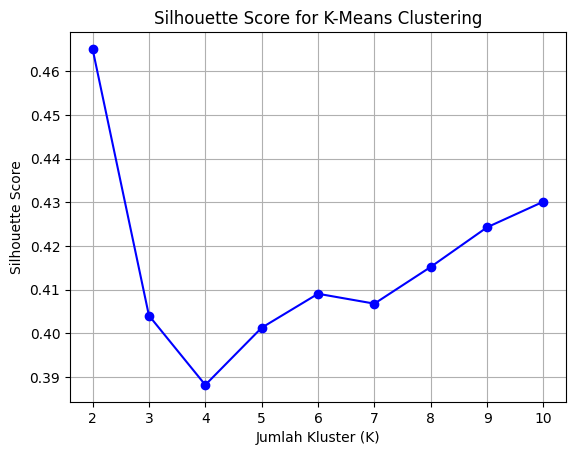

In [38]:
from sklearn.metrics import silhouette_score

# Memilih atribut yang akan digunakan untuk analisis klastering
attributes = df[['AirQuality', 'WaterPollution']]

# Inisialisasi list untuk menyimpan nilai Silhouette Score
silhouette_scores = []

# Menghitung Silhouette Score untuk K dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(attributes)
    silhouette_avg = silhouette_score(attributes, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for K={k}: {silhouette_avg}")

# Membuat plot Silhouette Score
import matplotlib.pyplot as plt

plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Jumlah Kluster (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Means Clustering')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for K=2: 0.8297496727917878
Davies-Bouldin Index for K=3: 0.8832388176352582
Davies-Bouldin Index for K=4: 0.9067235965186757
Davies-Bouldin Index for K=5: 0.8632035564060073
Davies-Bouldin Index for K=6: 0.8235629914059747
Davies-Bouldin Index for K=7: 0.8447544241600763


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies-Bouldin Index for K=8: 0.8088696518102478


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies-Bouldin Index for K=9: 0.7423005623175717


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies-Bouldin Index for K=10: 0.7637272403490487


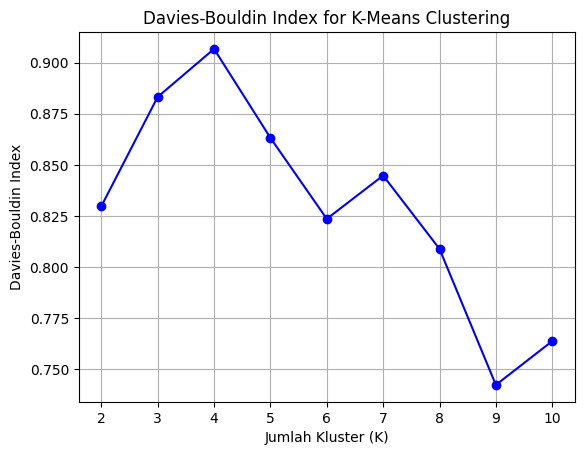

In [39]:
from sklearn.metrics import davies_bouldin_score

# Memilih atribut yang akan digunakan untuk analisis klastering
attributes = df[['AirQuality', 'WaterPollution']]

# Inisialisasi list untuk menyimpan nilai Davies-Bouldin Index
davies_bouldin_scores = []

# Menghitung Davies-Bouldin Index untuk K dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(attributes)
    davies_bouldin_score_value = davies_bouldin_score(attributes, labels)
    davies_bouldin_scores.append(davies_bouldin_score_value)
    print(f"Davies-Bouldin Index for K={k}: {davies_bouldin_score_value}")

# Membuat plot Davies-Bouldin Index
import matplotlib.pyplot as plt

plt.plot(range(2, 11), davies_bouldin_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Jumlah Kluster (K)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for K-Means Clustering')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calinski-Harabasz Index for K=2: 4523.054698853484


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calinski-Harabasz Index for K=3: 4153.176441941218
Calinski-Harabasz Index for K=4: 3979.8319509419507
Calinski-Harabasz Index for K=5: 3893.136229915556
Calinski-Harabasz Index for K=6: 3947.112953853567
Calinski-Harabasz Index for K=7: 4002.0989754580005


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Calinski-Harabasz Index for K=8: 4142.993140591035
Calinski-Harabasz Index for K=9: 4330.503117339195
Calinski-Harabasz Index for K=10: 4315.744749323153


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


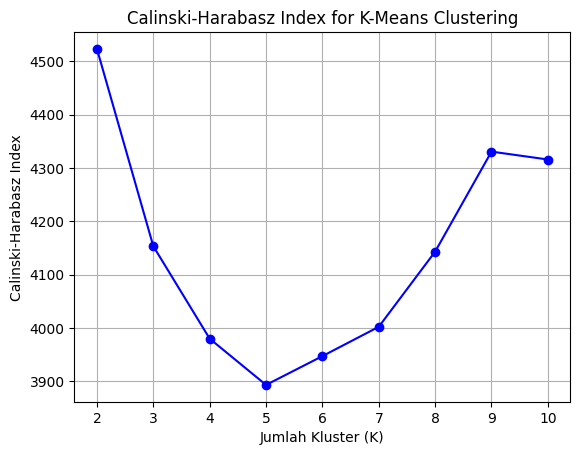

In [40]:
from sklearn.metrics import calinski_harabasz_score

# Memilih atribut yang akan digunakan untuk analisis klastering
attributes = df[['AirQuality', 'WaterPollution']]

# Inisialisasi list untuk menyimpan nilai Calinski-Harabasz Index
calinski_harabasz_scores = []

# Menghitung Calinski-Harabasz Index untuk K dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(attributes)
    calinski_harabasz_score_value = calinski_harabasz_score(attributes, labels)
    calinski_harabasz_scores.append(calinski_harabasz_score_value)
    print(f"Calinski-Harabasz Index for K={k}: {calinski_harabasz_score_value}")

# Membuat plot Calinski-Harabasz Index
import matplotlib.pyplot as plt

plt.plot(range(2, 11), calinski_harabasz_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Jumlah Kluster (K)')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for K-Means Clustering')
plt.grid(True)
plt.show()